#Task 1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
print(df.info)
print("Observation 1:","Column 1, column 2, column 3 and column 4 are empty")
print("Observation 2:","This dataframe consists of 7050 rows and 16 columns")

<bound method DataFrame.info of       status_id status_type status_published  ...  Column2  Column3  Column4
0             1       video   4/22/2018 6:00  ...      NaN      NaN      NaN
1             2       photo  4/21/2018 22:45  ...      NaN      NaN      NaN
2             3       video   4/21/2018 6:17  ...      NaN      NaN      NaN
3             4       photo   4/21/2018 2:29  ...      NaN      NaN      NaN
4             5       photo   4/18/2018 3:22  ...      NaN      NaN      NaN
...         ...         ...              ...  ...      ...      ...      ...
7045       7046       photo   9/24/2016 2:58  ...      NaN      NaN      NaN
7046       7047       photo  9/23/2016 11:19  ...      NaN      NaN      NaN
7047       7048       photo  9/21/2016 23:03  ...      NaN      NaN      NaN
7048       7049       photo   9/20/2016 0:43  ...      NaN      NaN      NaN
7049       7050       photo  9/10/2016 10:30  ...      NaN      NaN      NaN

[7050 rows x 16 columns]>
Observation 1: Co

In [ ]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [ ]:
df["status_type"].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["status_type"] = le.fit_transform(df["status_type"])
df["status_published"] = le.fit_transform(df["status_published"])
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,3,3949,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,1,3917,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,3,3921,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,1,3920,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,1,3832,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,1,6691,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,1,6676,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,1,6643,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,1,6625,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


#Task 2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = ["num_reactions","num_comments","num_shares","num_likes","num_loves","num_wows","num_hahas","num_sads","num_angrys"]
df[d]= scaler.fit_transform(df[d])
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN


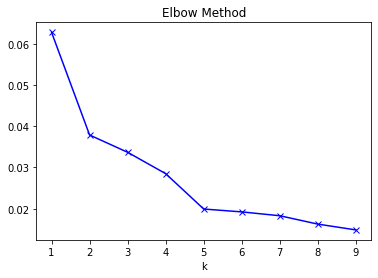

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

x1 = np.array(df["num_reactions"])
x2 = np.array(df["num_comments"])


plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.title("Elbow Method")
plt.show()



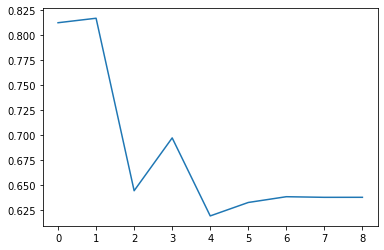

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df[d])
  labels = kmeans.labels_
  sil.append(silhouette_score(df[d], labels, metric = 'euclidean'))
plt.plot(sil)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df[d])


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score([0, 0, 1, 1], [1, 1, 1, 1])

0.0

#Task 3

In [ ]:
from sklearn.decomposition import PCA
df1 = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv")
pca = PCA(n_components=2)
pca.fit(df1)
pca.components_

array([[ 7.21640491e-04,  9.99801105e-01,  1.30294190e-02,
         1.50814711e-02, -1.11556357e-04],
       [ 7.62665550e-01, -7.77757544e-03, -1.68186136e-01,
         6.24292671e-01, -1.59013577e-02]])

In [ ]:
from sklearn.preprocessing import normalize

df1_scaled = normalize(df1)
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)
df1_scaled

,fruit_label,mass,width,height,color_score
0,0.005200,0.998307,0.043676,0.037956,0.002860
1,0.005546,0.998282,0.044368,0.037713,0.003272
2,0.005672,0.998262,0.041972,0.040838,0.003403
3,0.023154,0.995623,0.071777,0.054412,0.009262
4,0.023706,0.995650,0.071118,0.054524,0.009364
5,0.024890,0.995598,0.072181,0.053513,0.009583
6,0.024888,0.995503,0.073418,0.053508,0.010079
7,0.026193,0.995333,0.075960,0.052386,0.010608
8,0.005608,0.998220,0.039817,0.043742,0.005159
9,0.005804,0.998221,0.042947,0.040625,0.005165


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(df1_scaled)
print(pca.components_)
print('\nVariance of each component:', pca.explained_variance_ratio_)


[[-0.5778779   0.06839382 -0.50283363 -0.63311812 -0.08774512]
 [-0.45195035 -0.01964077  0.83947009 -0.2737081   0.12541518]
 [ 0.67862746  0.0025227   0.12398342 -0.72292368  0.03831291]
 [ 0.02171953  0.04165841  0.15852612 -0.00454545 -0.98622596]]

Variance of each component: [0.71598844 0.22788447 0.05498702 0.00108144]
